## This notebook was created in ad hoc mode for calculating the Kolmogorov–Smirnov test and the q-q plot of the best model ($\alpha$-stable)

In [1]:
from datetime import datetime
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd
import scipy.stats as st
from functools import partial
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
import alPhaStablePricer as alpha

In [2]:
df = pdr.data.DataReader("AAPL",'yahoo', #"av-intraday",
                         end=datetime(2021, 6, 20, 15, 28, 47, 573840),#datetime.today()
                         api_key="ZDT39A5EINVODTVI")
display(df)
initial_value=df["Close"][-1]
df.index = pd.to_datetime(df.index)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-28,23.415001,23.035000,23.225000,23.397499,161779600.0,21.857594
2016-06-29,23.637501,23.407499,23.492500,23.600000,146124000.0,22.046766
2016-06-30,23.942499,23.575001,23.610001,23.900000,143345600.0,22.327021
2016-07-01,24.117500,23.832500,23.872499,23.972500,104106000.0,22.394749
2016-07-05,23.850000,23.615000,23.847500,23.747499,110820800.0,22.184555
...,...,...,...,...,...,...
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,130.479996
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,129.639999
2021-06-16,130.889999,128.460007,130.369995,130.149994,91815000.0,130.149994


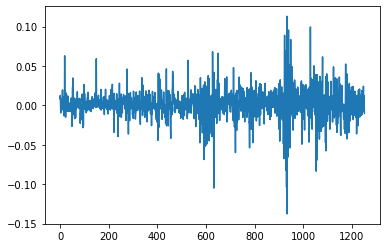

Date
2016-06-29    0.008618
2016-06-30    0.012632
2016-07-01    0.003029
2016-07-05   -0.009430
2016-07-06    0.005669
Name: Close, dtype: float64

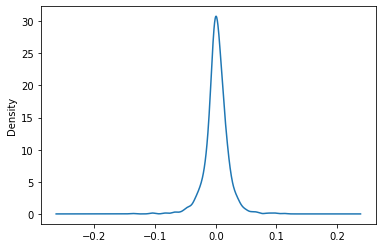

In [3]:
df = pd.Series(np.log(df.Close) - np.log(df.Close.shift(1))[1:],index=df.index[1:])
df.plot(use_index=False)
plt.show()
df.plot.kde()
df.head()

In [4]:
dataset = df[-250:]

In [5]:
print("Shapiro test of normality: statistic={}, p_value={}".format(st.shapiro(dataset)[0],st.shapiro(dataset)[1]))

Shapiro test of normality: statistic=0.977552592754364, p_value=0.00054467300651595


In [6]:
print("Jarque Bera test of normality: statistic={}, p_value={}".format(st.jarque_bera(dataset)[0],st.shapiro(dataset)[1]))

Jarque Bera test of normality: statistic=48.39947581560408, p_value=0.00054467300651595


In [7]:
alpha_model = alpha.AlPhaStablePricer()

In [8]:
%%time
alpha_model.fit(dataset)

CPU times: user 13min 8s, sys: 0 ns, total: 13min 8s
Wall time: 13min 8s


In [9]:
pd.DataFrame({"Alpha-Stable":alpha_model.aic}.items(),
             columns=["Model","AIC"]).sort_values("AIC")

,Model,AIC
0,Alpha-Stable,-1209.693433


In [10]:
def stable_cdf(x):
    return st.levy_stable(alpha=alpha_model.alpha,
                    beta=alpha_model.betta,
                    loc=alpha_model.mu,
                    scale=alpha_model.c).cdf(x) 

In [11]:
st.kstest(dataset,stable_cdf)

KstestResult(statistic=0.03663459430391136, pvalue=0.878053965901486)

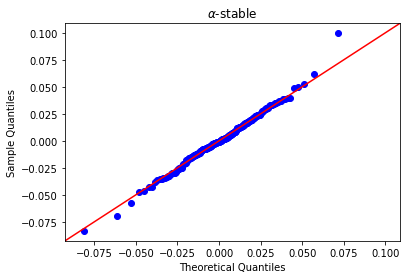

In [12]:
qqplot(dataset,st.levy_stable(alpha=alpha_model.alpha,
                    beta=alpha_model.betta,
                    loc=alpha_model.mu,
                    scale=alpha_model.c),
       fit=False,
       line="45")

plt.title(r'$\alpha$-stable')
plt.savefig('q-qPlotStable.eps', format='eps')

Text(0.5, 1.0, 'Brownian motion')

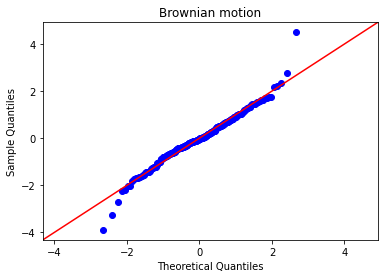

In [13]:
qqplot(dataset,
       fit=True,
       line="45")

plt.title("Brownian motion")